# Titanic Data Analysis

## Background
Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. (https://en.wikipedia.org/wiki/RMS_Titanic)
## Question Definition
According to some news, some groups of people were more likely to survive than others, such as women, children.  
But it is doubtful whether the truth is like this or not.
So the question is what factors affected the survived rate. 

## Workflow
To analyse the data, I follow these stages:  
&emsp; 1.Coding the data  
&emsp; 2.Checking the data  
&emsp; 3.Structuring the data  
&emsp; 4.Describing the data  
&emsp; 5.Exploring the data  
&emsp; 6.Visualising the data  
&emsp; 7.Reporting the data

## Prepare Package

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Acquire Data

In [2]:
data=pd.read_csv('C:/Users/lenovo/project 4/titanic-data.csv')

In [3]:
print(data.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Check Data
1. It is hard to review a large dataset, however reviewing a few samples from a smaller dataset may just tell something. For example, Variable Name may contain errors as there are several ways used to describe a name.
2. Check which variables contains null values. It is obvious that variables Cabin, Age and Embarked contain null values. Additionaly, variables Cabin contains the largest number of null values, while Emabrked contains the least number.
3. About data types, seven variables are integer or floats and five variables are strings.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


##### To deal with the null values, 
1. Treat the variable Age where the null values mean missing data. The size of the missing data is large, thus use 'ffill' method to replace the null values.
2. Treat the variable Embarked where the null values mean missing data. The size of the missing data is small, thus drop the null values directly.

In [7]:
data['Age'].fillna(method='ffill',inplace=True)
data['Embarked'].dropna(inplace=True)

In [8]:
data['Sex'].replace(to_replace=dict(female=1, male=0), inplace=True)
data['Embarked'].replace(to_replace=dict(S=1, C=2,Q=3), inplace=True)

## Structure Data
According to the data, there are 12 variables.  
Among these variables, I classify them into four categories.  
Nominal categorical variables: PassengerId, Survived, Name, Sex, Ticket, Cabin, Embarked  
Ordinal categorical variables: Pclass  
Continous numerical variables: Age, Fare  
Discrete numerical variables: SibSp, Parch  


## Describe Data
1. Total samples are 891.  
2. Around 38.4% people survived in this sample.
3. Most passengers (> 76%) did not travel with parents or children.
4. Nearly 31% of the passengers had siblings and/or spouse aboard.
5. Fares varied significantly with few passengers (<1%) paying as high as $512.
6. Few elderly passengers (<1%) within age range 65-80.

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.00000,8.000000,6.000000,512.329200


In [10]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
data['Parch'].value_counts()[0]/891.0

0.76094276094276092

In [12]:
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [13]:
1-data['SibSp'].value_counts()[0]/891.0

0.31762065095398428

In [14]:
data.describe([.1, .2, .3, .4, .5, .6, .7, .8, .9, .99])

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.42000,0.000000,0.000000,0.000000
10%,90.000000,0.000000,1.000000,0.000000,11.00000,0.000000,0.000000,7.550000
20%,179.000000,0.000000,1.000000,0.000000,19.00000,0.000000,0.000000,7.854200
30%,268.000000,0.000000,2.000000,0.000000,22.00000,0.000000,0.000000,8.050000
40%,357.000000,0.000000,2.000000,0.000000,25.00000,0.000000,0.000000,10.500000
50%,446.000000,0.000000,3.000000,0.000000,28.00000,0.000000,0.000000,14.454200
60%,535.000000,0.000000,3.000000,0.000000,32.00000,0.000000,0.000000,21.679200


7. There is no repeat name in the sample.
8. There are 64.8% male in the sample.
9. Several passengers shared the same cabin because the cabin values have several dupicates across samples.
10. Embarked takes three possible values. Southampton port used by most passengers
11. Ticket feature has high ratio (22%) of duplicate values. This result is similar to that most passengers (> 76%) did not travel with parents or children, which means that probably who travels with parents or children shared same ticket number.

In [15]:
data.describe(include=['O'])

,Name,Ticket,Cabin,Embarked
count,891,891,204,889
unique,891,681,147,3
top,"Graham, Mr. George Edward",CA. 2343,C23 C25 C27,S
freq,1,7,4,644


## Explore Data
According to the correlation analysis, 
1. It is obvious that variables Pclass, Sex, Fare, Cabin and Embarked have a relationship with Survived.
2. It is obvious that Fare and Pclass have a direct relationship.
3. Additionally, it is interesting that there is a relationship between Embarked and Survived.

In [16]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.58156,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.55459,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.42000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.00000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.00000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.00000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.00000,8.000000,6.000000,512.329200


In [17]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.026653,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.065571,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.291157,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.058415,0.114631,0.245489,0.182333
Age,0.026653,-0.065571,-0.291157,-0.058415,1.000000,-0.206104,-0.165191,0.083417
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.206104,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.165191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.083417,0.159651,0.216225,1.000000


#### The relationship between Pclass and Survived

In [18]:
data[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [19]:
data.groupby('Pclass')['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

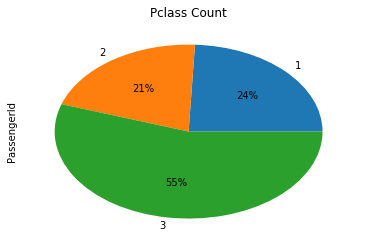

In [20]:
data.groupby('Pclass')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Pclass Count')
plt.show()

#### The relationship between Sex and Survived

In [21]:
data[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.188908
1,1,0.742038


In [22]:
data.groupby('Sex')['PassengerId'].count()

Sex
0    577
1    314
Name: PassengerId, dtype: int64

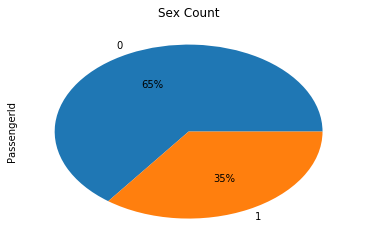

In [23]:
data.groupby('Sex')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Sex Count')
plt.show()

#### The relationship between Embarked and Survived

In [24]:
data[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [25]:
data.groupby('Embarked')['PassengerId'].count()

Embarked
C    168
Q     77
S    644
Name: PassengerId, dtype: int64

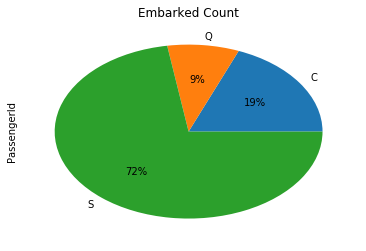

In [26]:
data.groupby('Embarked')['PassengerId'].count().plot(kind='pie', autopct='%.0f%%')
plt.title('Embarked Count')
plt.show()

#### After further analysis,
1. The survive rate of female is much higher than male.
2. The Pclass=1 has the highest survive rate.
3. People who embarked from Cherbourg have the highest survive rate.

## Visualise Data

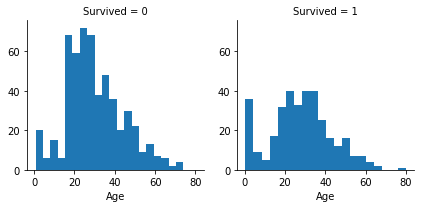

In [27]:
grid = sns.FacetGrid(data, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

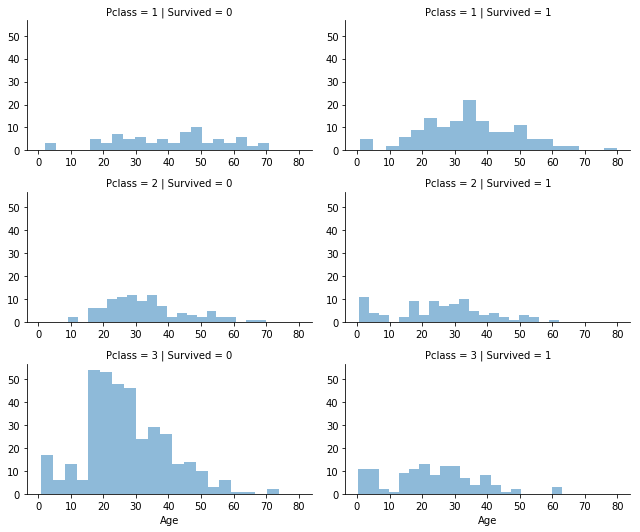

In [28]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.5, aspect=1.8)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)

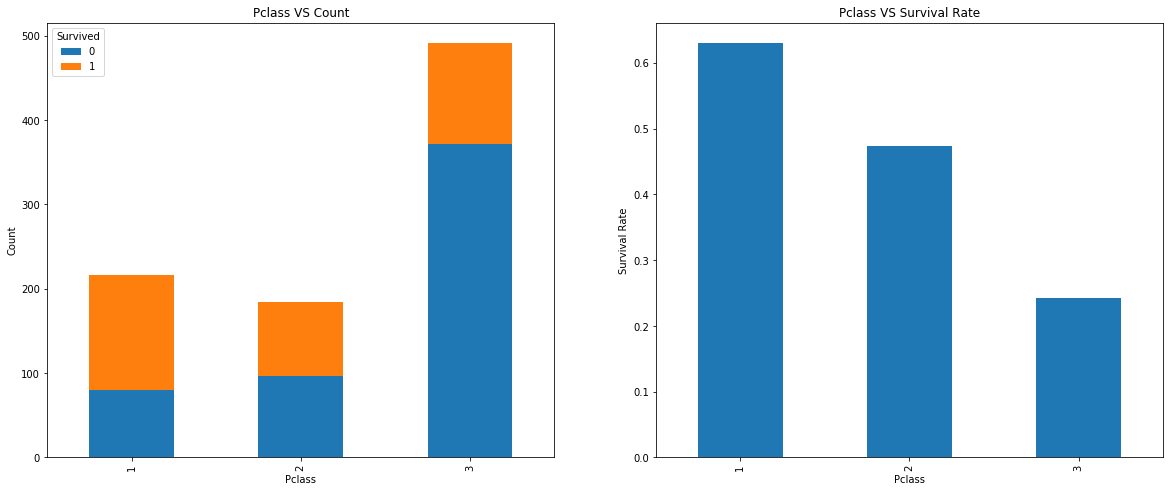

In [29]:
plt.figure(figsize=(12,5))
f,(ax1,ax2)=plt.subplots(1,2)
f.set_size_inches((20,8))
data.groupby(['Pclass','Survived'])['PassengerId'].count().unstack().plot(kind='bar',ax=ax1,stacked=True)
ax1.set_title('Pclass VS Count')
ax1.set_ylabel('Count')

data.groupby('Pclass')['Survived'].mean().plot(kind='bar',ax=ax2)
ax2.set_title('Pclass VS Survival Rate')
ax2.set_ylabel('Survival Rate')
plt.show()

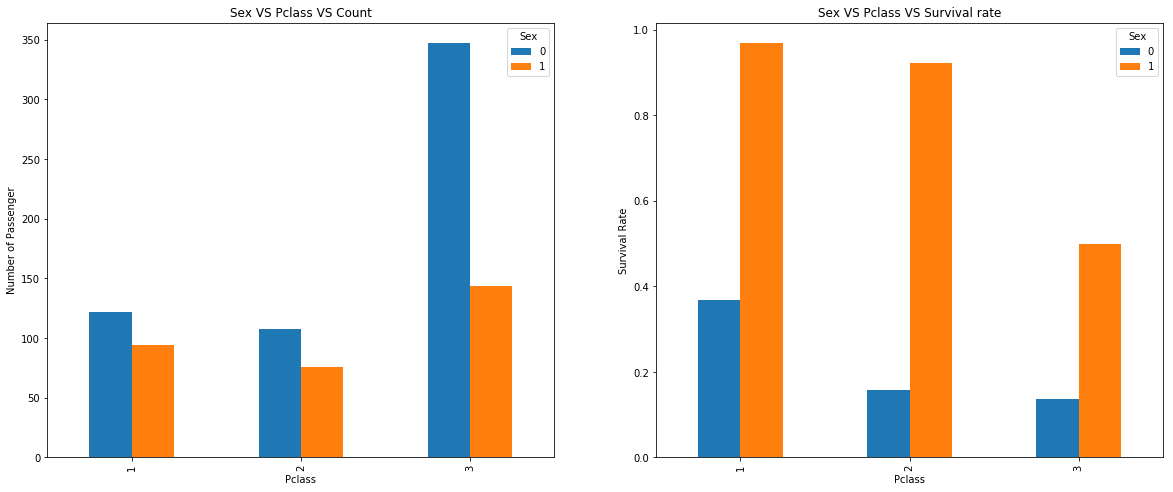

In [30]:
plt.figure(figsize=(14,5))
f,(ax1,ax2)=plt.subplots(1,2)
ax1.set_title('Sex VS Pclass VS Count')
ax1.set_ylabel('Number of Passenger')
ax2.set_title('Sex VS Pclass VS Survival rate')
ax2.set_ylabel('Survival Rate')
f.set_size_inches((20,8))
data.groupby(['Pclass','Sex'])['Survived'].count().unstack().plot(kind='bar',ax=ax1)
data.groupby(['Pclass','Sex'])['Survived'].mean().unstack().plot(kind='bar',ax=ax2)

## Conclusion
Based on the analysis, we can find that what data tells us is not what stories tell us. In specific,
1. More rich people survived than poor people if we assume the Pclass has a positive relationship with the wealth.
2. For the survived rate, it is obvious that female have higher rate than the male. For my percepective, probably male cared female than themselves.

#### Limitation
It is obvious that there are some limitations in this report.
1. There were an estimated 2,224 passengers and crew aboard, but in this report I just use 891 samples, which means that probably the sample cannot represent the population. To analyse whether this sample can represent the population, I need to do statistics test.
2. I used 'ffill' method to fill the null values in the variable Age, which probably casued bias.
3. Based on the data analysis, I found that the Pclass=1 group has the highest survived rate. I concluded that more rich people survived. But to tell the truth, the first-class room is much closer to escape cabins, which probably is the true factors that affects survive rate.